# Exploratory Data Analysis

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
df = pd.read_csv('Datasets/companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [4]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
df.shape

(196553, 44)

In [6]:
df.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [7]:
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [8]:
df.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [9]:
df.drop(['id','entity_type','entity_id','name','normalized_name','parent_id','permalink', 
              'domain','homepage_url', 'twitter_username','logo_url','logo_width','logo_height',
              'short_description','description','overview','first_investment_at','last_investment_at','parent_id',
              'tag_list','state_code','city','region','relationships','created_by',
              'updated_at','investment_rounds','invested_companies','created_at','ROI'], axis=1, inplace=True)

In [10]:
df

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.052234,-118.243685


In [11]:
df['founded_at'] = pd.to_datetime(df['founded_at'],format="%Y-%m-%d")
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'],format="%Y-%m-%d")
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'],format="%Y-%m-%d")
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at'],format="%Y-%m-%d")
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at'],format="%Y-%m-%d")



In [12]:
df.dtypes

category_code                 object
status                        object
founded_at            datetime64[ns]
closed_at                     object
country_code                  object
first_funding_at      datetime64[ns]
last_funding_at       datetime64[ns]
funding_rounds               float64
funding_total_usd            float64
first_milestone_at    datetime64[ns]
last_milestone_at     datetime64[ns]
milestones                   float64
lat                          float64
lng                          float64
dtype: object

In [13]:
df['founded_at'] = df['founded_at'].dt.year.astype('Int64')
df['first_funding_at'] = df['first_funding_at'].dt.year.astype('Int64')
df['last_funding_at'] = df['last_funding_at'].dt.year.astype('Int64')
df['first_milestone_at'] = df['first_milestone_at'].dt.year.astype('Int64')
df['last_milestone_at'] = df['last_milestone_at'].dt.year.astype('Int64')


In [14]:
df.head()

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
0,web,operating,2005,NaN,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,47.606209,-122.332071
1,games_video,acquired,<NA>,NaN,USA,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,34.021122,-118.396467
2,games_video,acquired,<NA>,NaN,USA,<NA>,<NA>,NaN,NaN,2003,2011,4.0,37.562992,-122.325525
3,network_hosting,operating,2008,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN
4,games_video,operating,2008,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN


In [15]:
for i in range(len(df)):
    if (df.iloc[i]['status'] == 'operating' or df.iloc[i]['status'] == 'ipo'):
        df.iloc[i,3] = 2021
    else:
        continue

In [16]:

df['closed_at'] = pd.to_numeric(df['closed_at'], errors='coerce')

In [17]:
df.describe()

,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
count,91227.000000,184575.0,31507.000000,31507.000000,31707.000000,2.787400e+04,91699.000000,91699.000000,91699.000000,83852.000000,83852.000000
mean,2005.720565,2021.0,2009.987717,2010.798299,1.659760,1.481652e+07,2007.060546,2007.409557,1.199402,37.564512,-52.123066
std,9.828483,0.0,2.839192,2.529087,1.201666,6.775937e+07,6.319687,6.386271,0.540099,15.477102,70.049067
min,1901.000000,2021.0,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,1.000000,-50.942326,-159.497746
25%,2004.000000,2021.0,2008.000000,2010.000000,1.000000,5.000000e+05,2005.000000,2005.000000,1.000000,34.052234,-111.940005
50%,2009.000000,2021.0,2011.000000,2012.000000,1.000000,2.564500e+06,2009.000000,2010.000000,1.000000,39.768403,-77.036871
75%,2011.000000,2021.0,2012.000000,2013.000000,2.000000,1.100000e+07,2011.000000,2012.000000,1.000000,45.421530,-0.127758
max,2014.000000,2021.0,2013.000000,2013.000000,15.000000,5.700000e+09,2014.000000,2014.000000,9.000000,77.553604,176.212549


In [18]:
df.founded_at.unique().value_counts()

1901    1
1986    1
1984    1
1983    1
1982    1
       ..
1935    1
1934    1
1933    1
1932    1
2014    1
Length: 114, dtype: Int64

In [19]:
df.isnull().sum()

category_code          73367
status                     0
founded_at            105326
closed_at              11978
country_code          108563
first_funding_at      165046
last_funding_at       165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
lat                   112701
lng                   112701
dtype: int64

In [20]:
df.first_funding_at.fillna(df.first_funding_at.mode().values[0], inplace= True)

In [21]:
df.funding_rounds.fillna(df.funding_rounds.mean(), inplace= True)

In [22]:
df.last_funding_at.fillna(df.last_funding_at.mode().values[0], inplace= True)

In [23]:
df.funding_total_usd.fillna(df.funding_total_usd.mean(), inplace= True)

In [24]:
df.first_milestone_at.fillna(df.first_milestone_at.mode().values[0], inplace= True)

In [25]:
df.last_milestone_at.fillna(df.last_milestone_at.mode().values[0], inplace= True)

In [26]:
df.milestones.fillna(int(df.milestones.mode()), inplace= True)

In [27]:
df.lat.fillna(df.lat.mean(), inplace= True)

In [28]:
df.lng.fillna(df.lng.mean(), inplace= True)

In [29]:
df.country_code.fillna(df.country_code.mode().values[0], inplace= True)

In [30]:
df.category_code.fillna(df.category_code.mode().values[0], inplace= True)

In [31]:
df['closed_at'] = df['closed_at'].fillna(2021)

In [32]:
df.dtypes

category_code          object
status                 object
founded_at              Int64
closed_at             float64
country_code           object
first_funding_at        Int64
last_funding_at         Int64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      Int64
last_milestone_at       Int64
milestones            float64
lat                   float64
lng                   float64
dtype: object

In [33]:
df.founded_at.fillna(df.founded_at.mean().astype('int64'),inplace=True)


In [34]:
df

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,lat,lng
0,web,operating,2005,2021.0,USA,2005,2008,3.00000,3.975000e+07,2010,2013,5.0,47.606209,-122.332071
1,games_video,acquired,2005,2021.0,USA,2013,2013,1.65976,1.481652e+07,2011,2013,1.0,34.021122,-118.396467
2,games_video,acquired,2005,2021.0,USA,2013,2013,1.65976,1.481652e+07,2003,2011,4.0,37.562992,-122.325525
3,network_hosting,operating,2008,2021.0,USA,2013,2013,1.65976,1.481652e+07,2011,2013,1.0,37.564512,-52.123066
4,games_video,operating,2008,2021.0,USA,2013,2013,1.65976,1.481652e+07,2011,2013,1.0,37.564512,-52.123066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,2021.0,USA,2013,2013,1.65976,1.481652e+07,2013,2013,2.0,37.774929,-122.419415
196549,public_relations,operating,2007,2021.0,USA,2008,2008,1.00000,7.500000e+05,2013,2013,1.0,37.338208,-121.886329
196550,consulting,operating,1959,2021.0,USA,2013,2013,1.65976,1.481652e+07,2012,2013,3.0,38.882334,-77.171091
196551,search,operating,2008,2021.0,USA,2013,2013,1.65976,1.481652e+07,2011,2013,1.0,34.052234,-118.243685


In [35]:
df.isna().sum()

category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
lat                   0
lng                   0
dtype: int64

In [36]:
df.duplicated().sum()

114222

In [37]:
df.drop_duplicates(inplace= True)

In [38]:
df.columns.duplicated().sum()

0

In [39]:
df.dtypes

category_code          object
status                 object
founded_at              Int64
closed_at             float64
country_code           object
first_funding_at        Int64
last_funding_at         Int64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      Int64
last_milestone_at       Int64
milestones            float64
lat                   float64
lng                   float64
dtype: object

<AxesSubplot:xlabel='first_funding_at'>

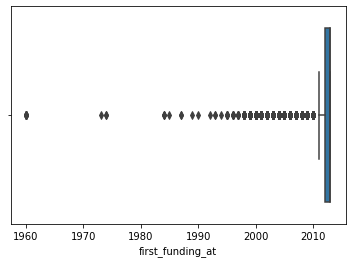

In [42]:
sns.boxplot(x=df['first_funding_at'])

<AxesSubplot:xlabel='last_funding_at'>

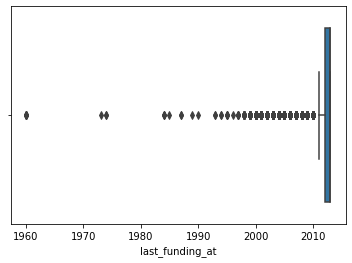

In [43]:
sns.boxplot(x=df['last_funding_at'])

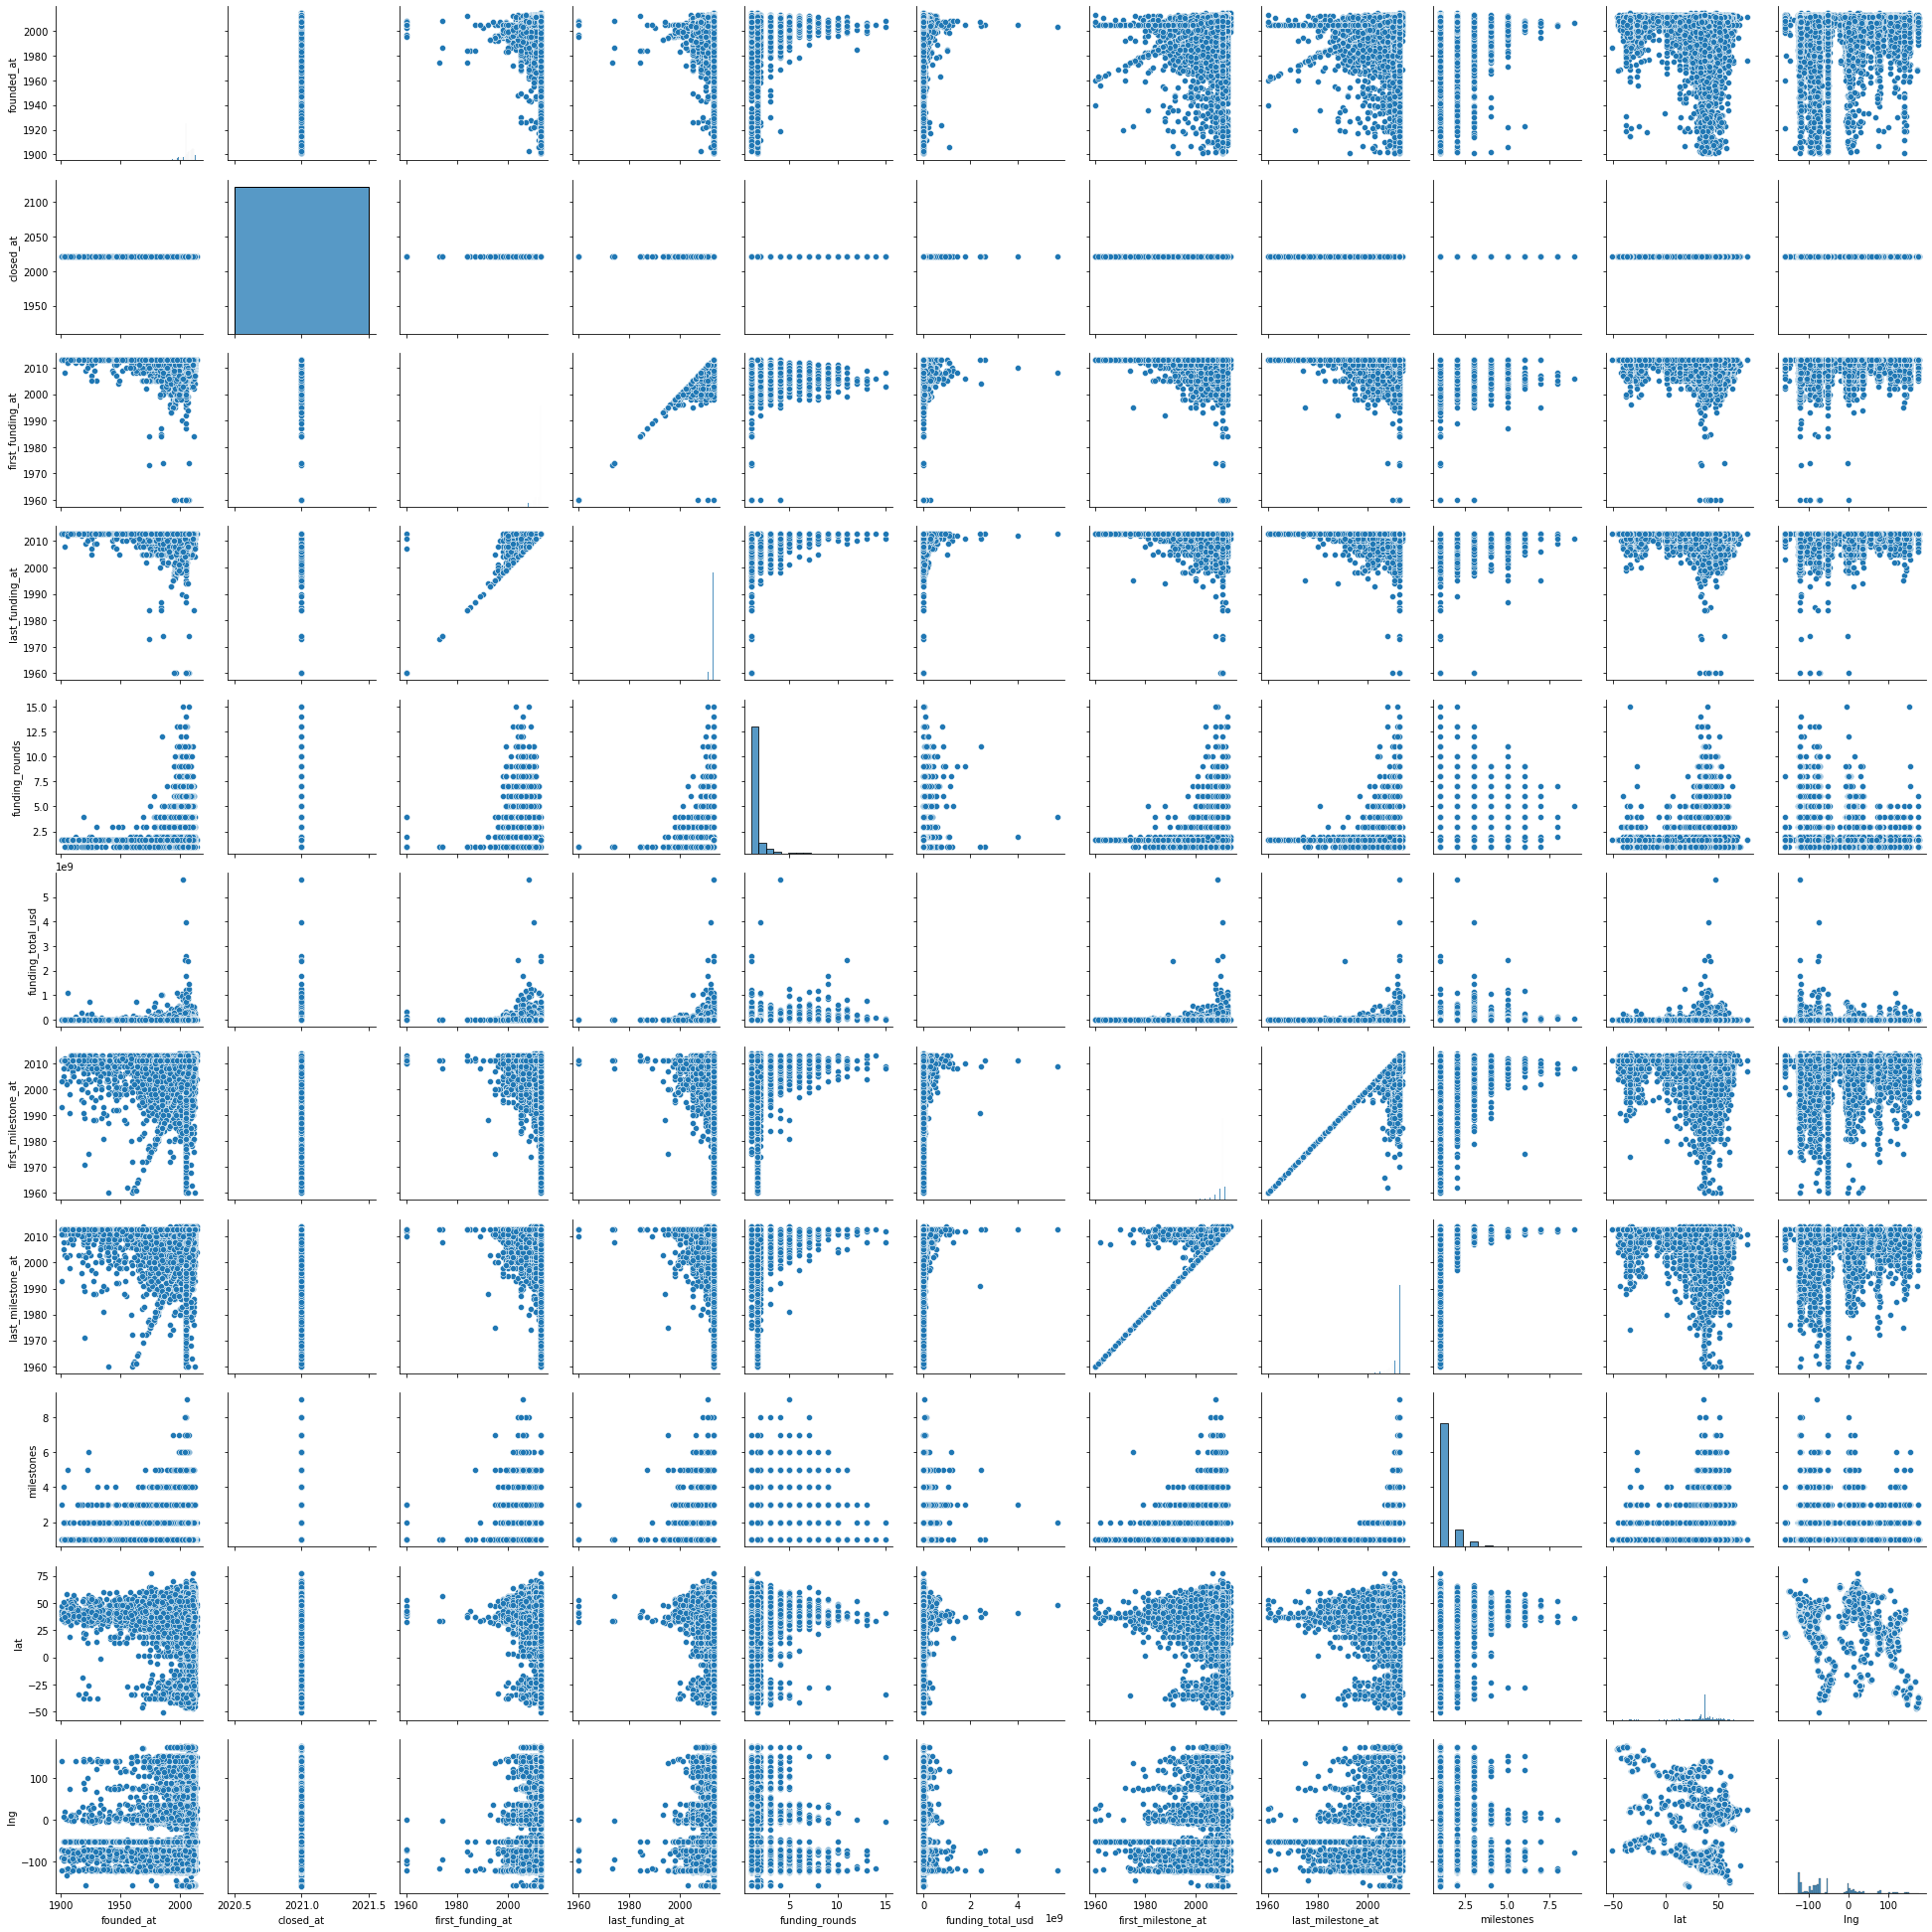

In [47]:
sns.pairplot(df)

Text(0.5, 1.0, 'Status of StartUp')

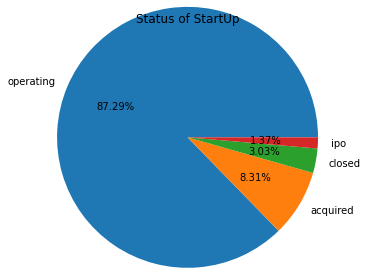

In [49]:
plt.pie(df.status.value_counts(),
        labels= df.status.value_counts().index,
        radius= 1.5,
        autopct= '%1.2f%%')
plt.title('Status of StartUp')